In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import keras
import re

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Define path to the data directory
url = r'https://raw.githubusercontent.com/PRIMEADAWAS/Python101/main/Pytorch101/mtsamples.csv'

In [ ]:
# import dataset
df = pd.read_csv(url)[['transcription', 'medical_specialty']]
df['medical_specialty'] = df['medical_specialty'].str.strip()

labelencoder = LabelEncoder()
# df['label'] = labelencoder.fit_transform(df['airline_sentiment'])
df['label'] = labelencoder.fit_transform(df['medical_specialty'])

# df = df.head(1000)
print('Downloading dataset...')
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(10)

Number of training sentences: 4,999



,transcription,medical_specialty,label
3010,"PREOPERATIVE DIAGNOSES:,1. Chronic renal fail...",Nephrology,21
4559,"CHIEF COMPLAINT:, The patient comes for bladd...",Consult - History and Phy.,5
956,"PREOPERATIVE DIAGNOSIS:, Brain tumor left tem...",Surgery,38
3782,"PREOPERATIVE DIAGNOSIS: , Recurrent tonsilliti...",ENT - Otolaryngology,11
1447,"SUBJECTIVE: ,School reports continuing diffic...",SOAP / Chart / Progress Notes,35
1477,"SUBJECTIVE:, The patient is here for a follow...",Rheumatology,34
3233,"CHIEF COMPLAINT: ,The patient does not have a...",General Medicine,15
3261,"CONSTITUTIONAL:, Normal; negative for fever, ...",General Medicine,15
1982,"PROCEDURE:, Left L5 transforaminal epidural s...",Pain Management,28
4052,"CHIEF COMPLAINT:, Dental pain.,HISTORY OF PRE...",Dentistry,7


In [ ]:
df.dropna(inplace=True)

## Class distribution 


In [ ]:
def showClass1():
  print('Total classes : ',df['medical_specialty'].nunique())
  df['medical_specialty'].value_counts().plot(kind='bar')

Total classes :  40


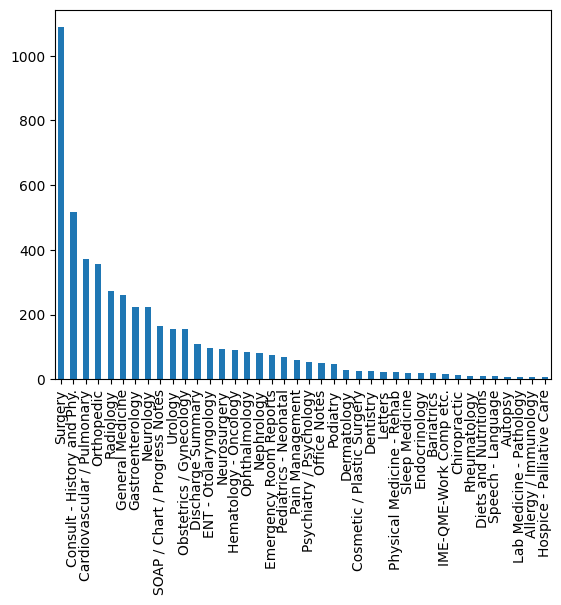

In [ ]:
showClass1()

In [ ]:
def showClass():
  print('Total classes : ',df['medical_specialty'].nunique())
  plt.figure(figsize=(8,8))
  sns.countplot(y='medical_specialty', 
                data = df, 
                order = df['medical_specialty'].value_counts().index)
  plt.show()

Total classes :  40


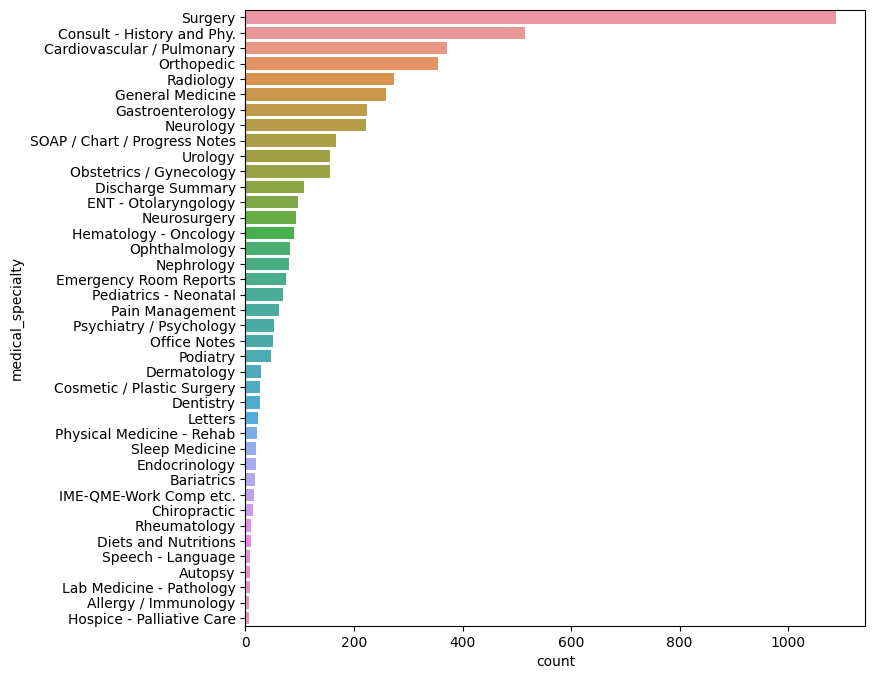

In [ ]:
showClass()

In [ ]:
df['medical_specialty'].unique()

array(['Allergy / Immunology', 'Bariatrics', 'Cardiovascular / Pulmonary',
       'Neurology', 'Dentistry', 'Urology', 'General Medicine', 'Surgery',
       'Speech - Language', 'SOAP / Chart / Progress Notes',
       'Sleep Medicine', 'Rheumatology', 'Radiology',
       'Psychiatry / Psychology', 'Podiatry', 'Physical Medicine - Rehab',
       'Pediatrics - Neonatal', 'Pain Management', 'Orthopedic',
       'Ophthalmology', 'Office Notes', 'Obstetrics / Gynecology',
       'Neurosurgery', 'Nephrology', 'Letters',
       'Lab Medicine - Pathology', 'IME-QME-Work Comp etc.',
       'Hospice - Palliative Care', 'Hematology - Oncology',
       'Gastroenterology', 'ENT - Otolaryngology', 'Endocrinology',
       'Emergency Room Reports', 'Discharge Summary',
       'Diets and Nutritions', 'Dermatology',
       'Cosmetic / Plastic Surgery', 'Consult - History and Phy.',
       'Chiropractic', 'Autopsy'], dtype=object)

remove non-medical specialty class

In [ ]:
exclusion_list = ['SOAP / Chart / Progress Notes', 'Consult - History exclusion_listnd Phy.', 'Office Notes', 'Letters', 'Lab Medicine - Pathology', 'IME-QME-Work Comp etc.', 'Hospice - Palliative Care', 'Discharge Summary', 'Consult - History and Phy.']
df = df[~df['medical_specialty'].isin(exclusion_list)]
df['medical_specialty'].value_counts()

Surgery                       1088
Cardiovascular / Pulmonary     371
Orthopedic                     355
Radiology                      273
General Medicine               259
Gastroenterology               224
Neurology                      223
Urology                        156
Obstetrics / Gynecology        155
ENT - Otolaryngology            96
Neurosurgery                    94
Hematology - Oncology           90
Ophthalmology                   83
Nephrology                      81
Emergency Room Reports          75
Pediatrics - Neonatal           70
Pain Management                 61
Psychiatry / Psychology         53
Podiatry                        47
Dermatology                     29
Dentistry                       27
Cosmetic / Plastic Surgery      27
Physical Medicine - Rehab       21
Sleep Medicine                  20
Endocrinology                   19
Bariatrics                      18
Chiropractic                    14
Rheumatology                    10
Diets and Nutritions

mask minor to small number class

In [ ]:
def groupClass(subClass, mainClass):
  df.loc[df.medical_specialty == subClass, "medical_specialty"] = mainClass

In [ ]:
for cls in ['Urology', 'Neurosurgery', 'Cosmetic / Plastic Surgery']:
  groupClass(cls, 'Surgery')
for cls in ['Dermatology', 'Endocrinology', 'Rheumatology']:
  groupClass(cls, 'General Medicine')
for cls in ['Pain Management', 'Psychiatry / Psychology', 'Podiatry', 'Dentistry', 'Physical Medicine - Rehab', 'Sleep Medicine', 'Bariatrics', 'Chiropractic', 'Diets and Nutritions', 'Speech - Language', 'Autopsy', 'Allergy / Immunology']:
  groupClass(cls, 'Minor')

Total classes :  16


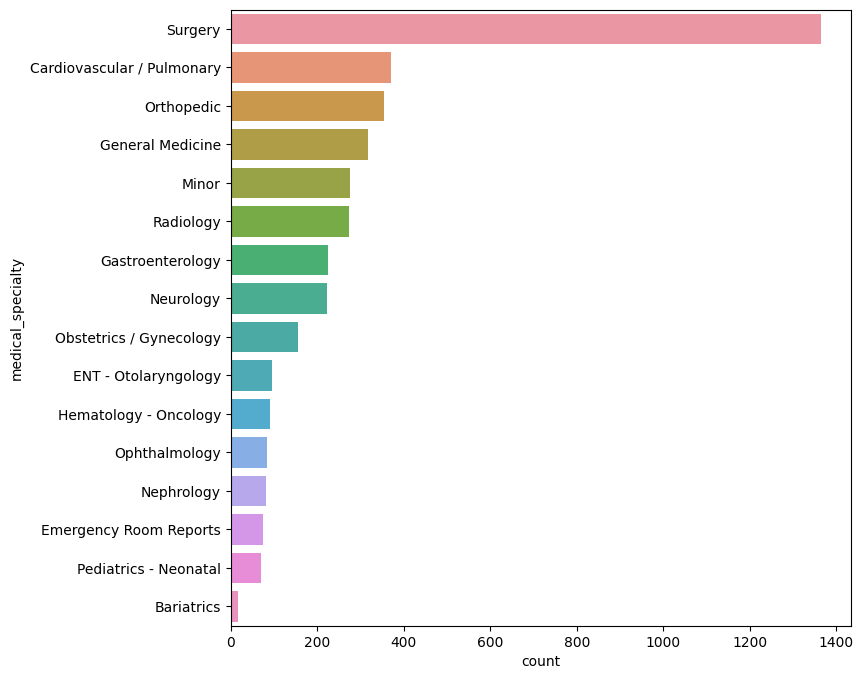

In [ ]:
showClass()

In [ ]:
df.loc[df['medical_specialty'] == 'Surgery'].sample(5)[['transcription', 'medical_specialty']]

,transcription,medical_specialty
271,"PREOPERATIVE DIAGNOSIS: , Tonsillitis.,POSTOPE...",Surgery
495,"PREOPERATIVE DIAGNOSES:,1. Displaced intraart...",Surgery
652,"PREOPERATIVE DIAGNOSES: , Right lumbosacral ra...",Surgery
780,"PREOPERATIVE DIAGNOSES:,1. Cellulitis with as...",Surgery
2667,"PROCEDURE:, Subcutaneous ulnar nerve transpos...",Surgery


In [ ]:
labelencoder = LabelEncoder()
# df['label'] = labelencoder.fit_transform(df['airline_sentiment'])
df['label'] = labelencoder.fit_transform(df['medical_specialty'])
df.sample(5)

,transcription,medical_specialty,label
1610,"CC: ,Headache.,HX: ,This 37y/o LHM was seen on...",Radiology,14
4039,"PREOPERATIVE DIAGNOSIS:, Right buccal and can...",Minor,7
1160,"PREOPERATIVE DX:, Dermatochalasis, mechanical ...",Surgery,15
2277,"PREOPERATIVE DIAGNOSIS: , Left knee medial fem...",Orthopedic,12
1952,"PREOPERATIVE DIAGNOSES,1. EMG-proven left car...",Minor,7


# Preprocessing

## X labels

In [ ]:
messages = df['transcription'].to_numpy()
messages[0]

'SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,

In [ ]:
import re
from tqdm import tqdm

def preprocess(message):
    """
    This function takes a string as input, then performs these operations: 
        - lowercase
        - remove URLs
        - remove ticker symbols 
        - removes punctuation
        - removes any single character tokens ?
    Parameters
    ----------
        message : The text message to be preprocessed
    Returns
    -------
        text: The preprocessed text
    """ 
    # Lowercase the twit message
    text = message.lower()
    # Replace URLs with a space in the message
    # text = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', text)
    # Replace ticker symbols with a space. The ticker symbols are any stock symbol that starts with $.
    # text = re.sub('\$[a-zA-Z0-9]*', ' ', text)
    # Replace StockTwits usernames with a space. The usernames are any word that starts with @.
    # text = re.sub('\@[a-zA-Z0-9]*', ' ', text)
    # Replace everything not a letter or apostrophe with a space
    text = re.sub('[^a-zA-Z0-9/\']', ' ', text)
    # Remove single letter words
    text = ' '.join( [w for w in text.split() if len(w)>1] )
    
    return text
        
# Process for all messages
preprocessed = [preprocess(message) for message in tqdm(messages)]

100%|██████████| 4073/4073 [00:01<00:00, 3987.90it/s]


In [ ]:
preprocessed[0]

'subjective this 23 year old white female presents with complaint of allergies she used to have allergies when she lived in seattle but she thinks they are worse here in the past she has tried claritin and zyrtec both worked for short time but then seemed to lose effectiveness she has used allegra also she used that last summer and she began using it again two weeks ago it does not appear to be working very well she has used over the counter sprays but no prescription nasal sprays she does have asthma but doest not require daily medication for this and does not think it is flaring up medications her only medication currently is ortho tri cyclen and the allegra allergies she has no known medicine allergies objective vitals weight was 130 pounds and blood pressure 124/78 heent her throat was mildly erythematous without exudate nasal mucosa was erythematous and swollen only clear drainage was seen tms were clear neck supple without adenopathy lungs clear assessment allergic rhinitis plan 

## Remove stopword

In [ ]:
from collections import Counter
import logging as logger
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def tokenize_text(text):
  words = [word for word in word_tokenize(text)]
  # Remove stop words
  stop = set(stopwords.words('english'))
  words = [word for word in words if (word not in stop)]
  # Lemmatize words (first noun, then verb)
  wnl = nltk.stem.WordNetLemmatizer()
  lemmatized = [wnl.lemmatize(wnl.lemmatize(word, 'n'), 'v') for word in words]
  return lemmatized

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
sentences = []
for index, message in tqdm(enumerate(preprocessed)):
  tokens = tokenize_text(message)
  new_sentence = ' '.join(tokens)
  sentences.append(new_sentence)

4073it [00:20, 196.96it/s]


## Y labels

In [ ]:
# Y = df['label']
Y = df['medical_specialty']
Y.shape, Y

((4073,),
 0                            Minor
 1                       Bariatrics
 2                       Bariatrics
 3       Cardiovascular / Pulmonary
 4       Cardiovascular / Pulmonary
                    ...            
 4994                         Minor
 4995                         Minor
 4996                         Minor
 4997                         Minor
 4998                         Minor
 Name: medical_specialty, Length: 4073, dtype: object)

In [ ]:
df.groupby(Y).size()

medical_specialty
Bariatrics                      18
Cardiovascular / Pulmonary     371
ENT - Otolaryngology            96
Emergency Room Reports          75
Gastroenterology               224
General Medicine               317
Hematology - Oncology           90
Minor                          277
Nephrology                      81
Neurology                      223
Obstetrics / Gynecology        155
Ophthalmology                   83
Orthopedic                     355
Pediatrics - Neonatal           70
Radiology                      273
Surgery                       1365
dtype: int64

# create Y sparse matrix result

In [ ]:
# Convert target Y to one hot encoded Y for Neural Network
Y = pd.get_dummies(Y)
Y

,Bariatrics,Cardiovascular / Pulmonary,ENT - Otolaryngology,Emergency Room Reports,Gastroenterology,General Medicine,Hematology - Oncology,Minor,Nephrology,Neurology,Obstetrics / Gynecology,Ophthalmology,Orthopedic,Pediatrics - Neonatal,Radiology,Surgery
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4995,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# train test split

In [ ]:
reviews = np.array(sentences)
labels = Y.values
# labels = df['label'].values
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, labels, test_size = 0.2, stratify = labels, random_state = 6536115)
# train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_sentences, train_labels, test_size = 0.25, stratify = train_labels)
# print(train_sentences.shape, val_sentences.shape, test_sentences.shape)

In [ ]:
test_labels.argmax(1)

array([15, 15, 15, 15, 10,  9, 10,  9, 15,  5, 15,  1, 10,  5, 15, 15, 14,
       15,  4, 12, 12,  5,  5, 15,  0, 15, 15,  5, 15, 15, 12,  3,  7, 15,
       15,  1,  1,  1,  8,  3, 15, 12,  2,  4, 15, 12,  7, 15, 15, 12,  9,
        5,  5, 15,  1, 15,  4, 15, 15, 15,  5,  5,  4,  3, 15, 15, 15, 15,
       15, 13,  2,  1, 15, 10,  4,  9, 15, 14,  1, 12,  1, 10,  4, 15, 15,
        7, 15, 15, 12, 15,  7,  4, 12, 12,  5,  4,  1,  5,  7, 10, 15,  1,
       13, 15,  9, 15, 15,  9, 15, 15, 15,  5, 15, 12, 14, 15, 15, 15, 10,
       10,  4,  6,  4, 14,  3,  7, 15, 11, 15, 10,  5,  7,  1, 12, 11,  1,
       15, 13, 10, 14,  4,  9, 11,  7, 15, 15,  7,  2,  1,  1, 14,  7, 15,
        7, 15, 15, 15, 15,  7,  6,  5, 14, 15, 14,  7, 12, 15, 14, 10, 13,
       15, 12,  9,  7,  0,  5, 15, 12,  7, 10, 15,  7,  7,  9,  9,  9, 14,
       12,  4, 14, 15,  0,  1,  9, 15, 14, 15,  5,  5,  5, 15, 15,  4, 15,
        8,  7,  9,  8, 15, 15,  4,  4,  8, 11,  1,  1, 12, 15,  7,  1,  5,
       12,  0,  1,  2, 10

In [ ]:
# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [ ]:
import tensorflow as tf

In [ ]:
# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(128)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5)
    keras.layers.Dense(df['medical_specialty'].nunique(), activation='softmax')
])
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 100)          300000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
Total params: 576,688
Trainable params: 576,688
Non-trainable params: 0
________________________________________________

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math

#Model train

In [ ]:
num_epochs = 4
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=1, 
                    validation_split=0.1)

Epoch 1/4
92/92 [==============================] - 65s 648ms/step - loss: 2.2749 - accuracy: 0.3533 - val_loss: 2.1306 - val_accuracy: 0.3865
Epoch 2/4
92/92 [==============================] - 63s 679ms/step - loss: 2.0184 - accuracy: 0.4110 - val_loss: 2.0948 - val_accuracy: 0.4018
Epoch 3/4
92/92 [==============================] - 74s 812ms/step - loss: 1.8294 - accuracy: 0.4465 - val_loss: 1.9427 - val_accuracy: 0.3834
Epoch 4/4
92/92 [==============================] - 64s 685ms/step - loss: 1.5870 - accuracy: 0.4792 - val_loss: 1.9906 - val_accuracy: 0.3681


# Result

In [ ]:
# The model is evaluated by calculating its accuracy. Accuracy of classification is calculated by dividing the number of correct predictions by the total number of predictions.
prediction = model.predict(test_padded)
prediction

26/26 [==============================] - 4s 165ms/step


array([[7.07597292e-06, 1.85581099e-03, 1.90572068e-03, ...,
        1.09369494e-03, 4.58005612e-04, 4.62049723e-01],
       [7.55896186e-03, 1.74031258e-02, 6.26609102e-02, ...,
        3.71688837e-03, 3.65182036e-03, 4.84089911e-01],
       [2.18303385e-03, 5.14662266e-02, 7.22348783e-03, ...,
        2.55878940e-02, 8.35699737e-02, 6.89679161e-02],
       ...,
       [1.72602267e-05, 4.67727426e-03, 1.47899264e-03, ...,
        2.53442884e-03, 5.94617799e-03, 2.04158127e-01],
       [6.21496656e-05, 4.95688710e-03, 5.44994511e-03, ...,
        3.26530822e-03, 1.70009932e-03, 4.37275231e-01],
       [8.46549775e-03, 4.28911060e-01, 1.30398795e-02, ...,
        3.48081253e-02, 2.53171828e-02, 1.53688714e-01]], dtype=float32)

In [ ]:
prediction.shape, prediction[0].argmax(), prediction[0]

((815, 16),
 12,
 array([7.0759729e-06, 1.8558110e-03, 1.9057207e-03, 6.2135623e-06,
        2.1201487e-05, 1.0379856e-04, 1.4593026e-05, 2.6417157e-02,
        1.2862081e-04, 3.0255974e-03, 1.2333909e-04, 1.2802352e-02,
        4.8998719e-01, 1.0936949e-03, 4.5800561e-04, 4.6204972e-01],
       dtype=float32))

In [ ]:
prediction.argmax(1)[:10]

array([12, 15,  7, 15, 14,  5, 15, 15,  5,  1])

In [ ]:
# pred_labels = []
# for i in prediction:
#     pred_labels.append(i.argmax())
# pred_labels[:5]

In [ ]:
# pred_labels = np.array(pred_labels)
pred_labels = prediction.argmax(1)
pred_labels[:10]

array([12, 15,  7, 15, 14,  5, 15, 15,  5,  1])

In [ ]:
test_labels = test_labels.argmax(1)
test_labels[:10]

AxisError: ignored

In [ ]:
def flat_accuracy(preds, labels):
    # pred_flat = np.argmax(preds, axis=1).flatten()
    pred_flat = preds.flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
print("Accuracy of prediction on test set : ", flat_accuracy(pred_labels, test_labels))

Accuracy of prediction on test set :  0.2


In [ ]:
labelencoder.classes_

array(['Bariatrics', 'Cardiovascular / Pulmonary', 'ENT - Otolaryngology',
       'Emergency Room Reports', 'Gastroenterology', 'General Medicine',
       'Hematology - Oncology', 'Minor', 'Nephrology', 'Neurology',
       'Obstetrics / Gynecology', 'Ophthalmology', 'Orthopedic',
       'Pediatrics - Neonatal', 'Radiology', 'Surgery'], dtype=object)

In [ ]:
label_map = dict(zip(labelencoder.transform(labelencoder.classes_), labelencoder.classes_))
label_map

{0: 'Bariatrics',
 1: 'Cardiovascular / Pulmonary',
 2: 'ENT - Otolaryngology',
 3: 'Emergency Room Reports',
 4: 'Gastroenterology',
 5: 'General Medicine',
 6: 'Hematology - Oncology',
 7: 'Minor',
 8: 'Nephrology',
 9: 'Neurology',
 10: 'Obstetrics / Gynecology',
 11: 'Ophthalmology',
 12: 'Orthopedic',
 13: 'Pediatrics - Neonatal',
 14: 'Radiology',
 15: 'Surgery'}

In [ ]:
pred_labels = [label_map[i] for i in pred_labels]
test_labels = [label_map[i] for i in test_labels]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
category_list = df['medical_specialty'].unique()
cm = confusion_matrix(test_labels, pred_labels)

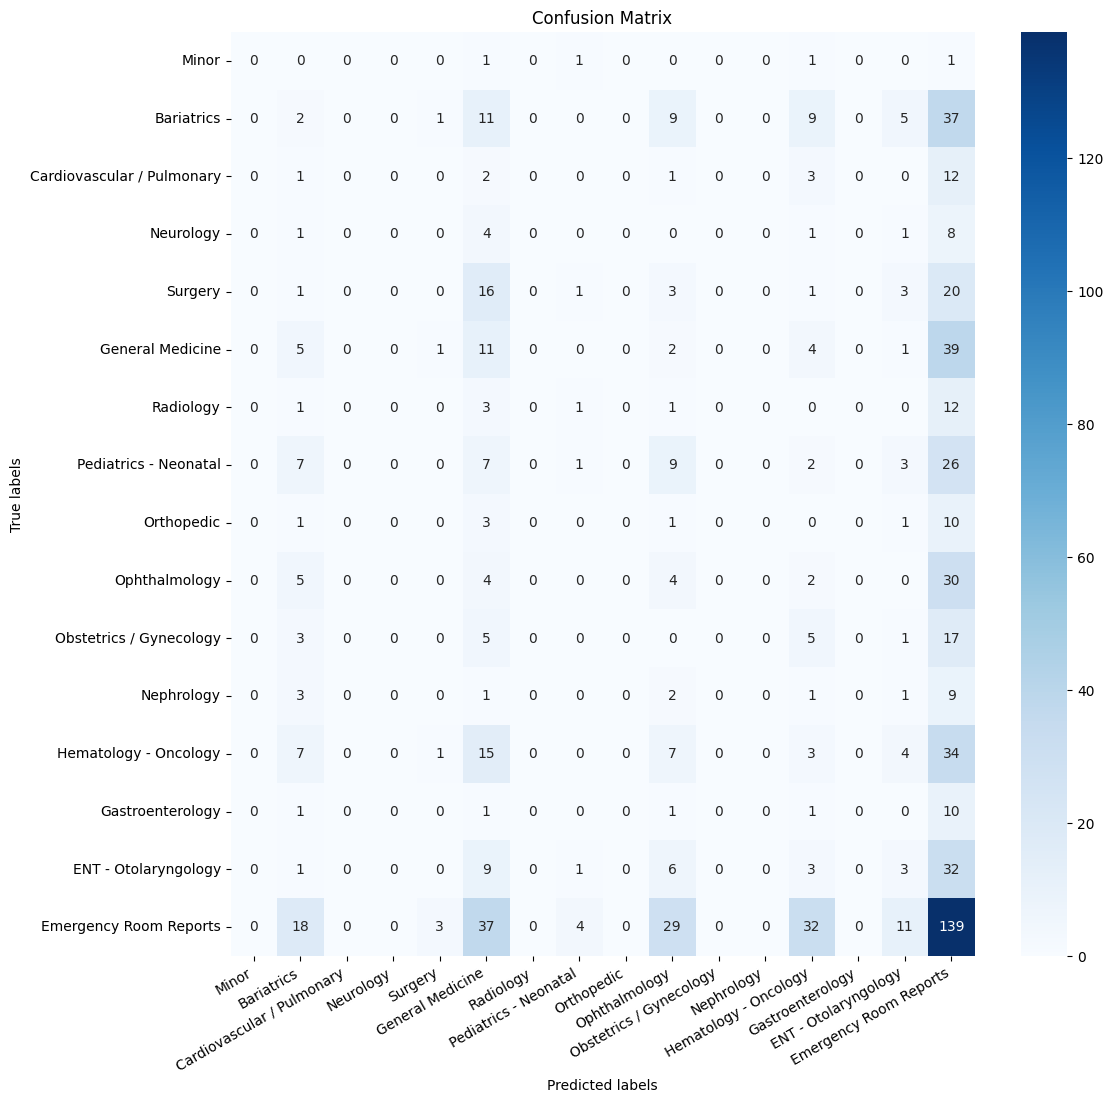

In [ ]:
fig = plt.figure(figsize=(12,12))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Blues",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(category_list); ax.yaxis.set_ticklabels(category_list);
plt.setp(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [ ]:
print(classification_report(test_labels, pred_labels, labels = category_list))

                            precision    recall  f1-score   support

                     Minor       0.11      0.02      0.03        55
                Bariatrics       0.00      0.00      0.00         4
Cardiovascular / Pulmonary       0.04      0.03      0.03        74
                 Neurology       0.05      0.09      0.07        45
                   Surgery       0.32      0.51      0.39       273
          General Medicine       0.08      0.17      0.11        63
                 Radiology       0.09      0.05      0.07        55
     Pediatrics - Neonatal       0.00      0.00      0.00        14
                Orthopedic       0.04      0.04      0.04        71
             Ophthalmology       0.00      0.00      0.00        17
   Obstetrics / Gynecology       0.00      0.00      0.00        31
                Nephrology       0.00      0.00      0.00        16
     Hematology - Oncology       0.00      0.00      0.00        18
          Gastroenterology       0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
